The Basics of Gradient Descent

Gradient descent is an optimization algorithm that attempts to find the minimum of a function.

As the name implies, the algorithm makes use of a function's gradient.

For some function $f(x, y, z, ...)$, we'll use its gradient ,$\nabla f$, to pick successive points closer and closer to a local minimum from some initial guess $(x_{0}, y_{0}, z_{0}, ...)$


Let's start with a simple one-dimensional (one variable) example.

Optimize (Find the minimum value of):
$$f(x) = 7x^2 - 17x - 193$$

<IPython.core.display.Javascript object>


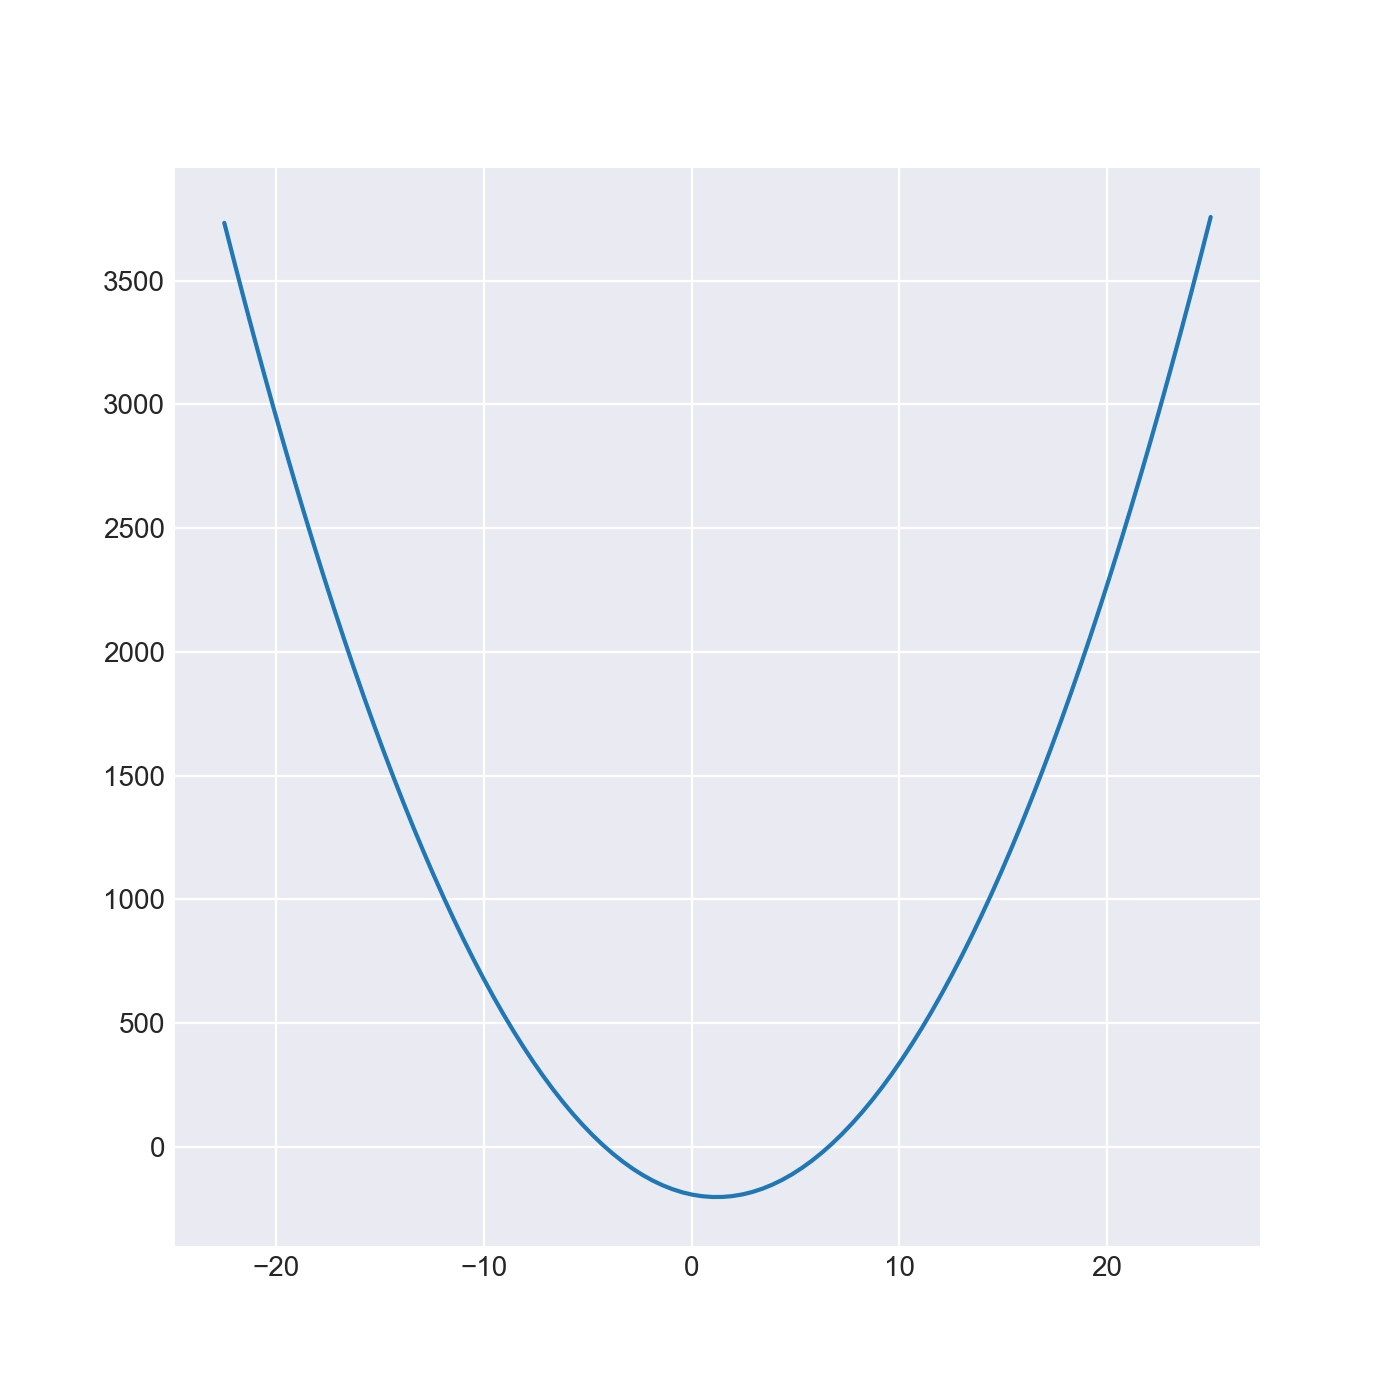

In [15]:
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['figure.figsize'] = (7, 7)



graph_x = np.linspace(-22.5, 25, 100)
graph_y = (7 * (graph_x ** 2)) - (17 * graph_x) - 193


sns.set_style("darkgrid")
plt.plot(graph_x, graph_y)
plt.show()

It's a parabola, with the minimum located somewhere between 1 and 2.

Let's start with an initial guess of $x_{0} = 15$.

<IPython.core.display.Javascript object>


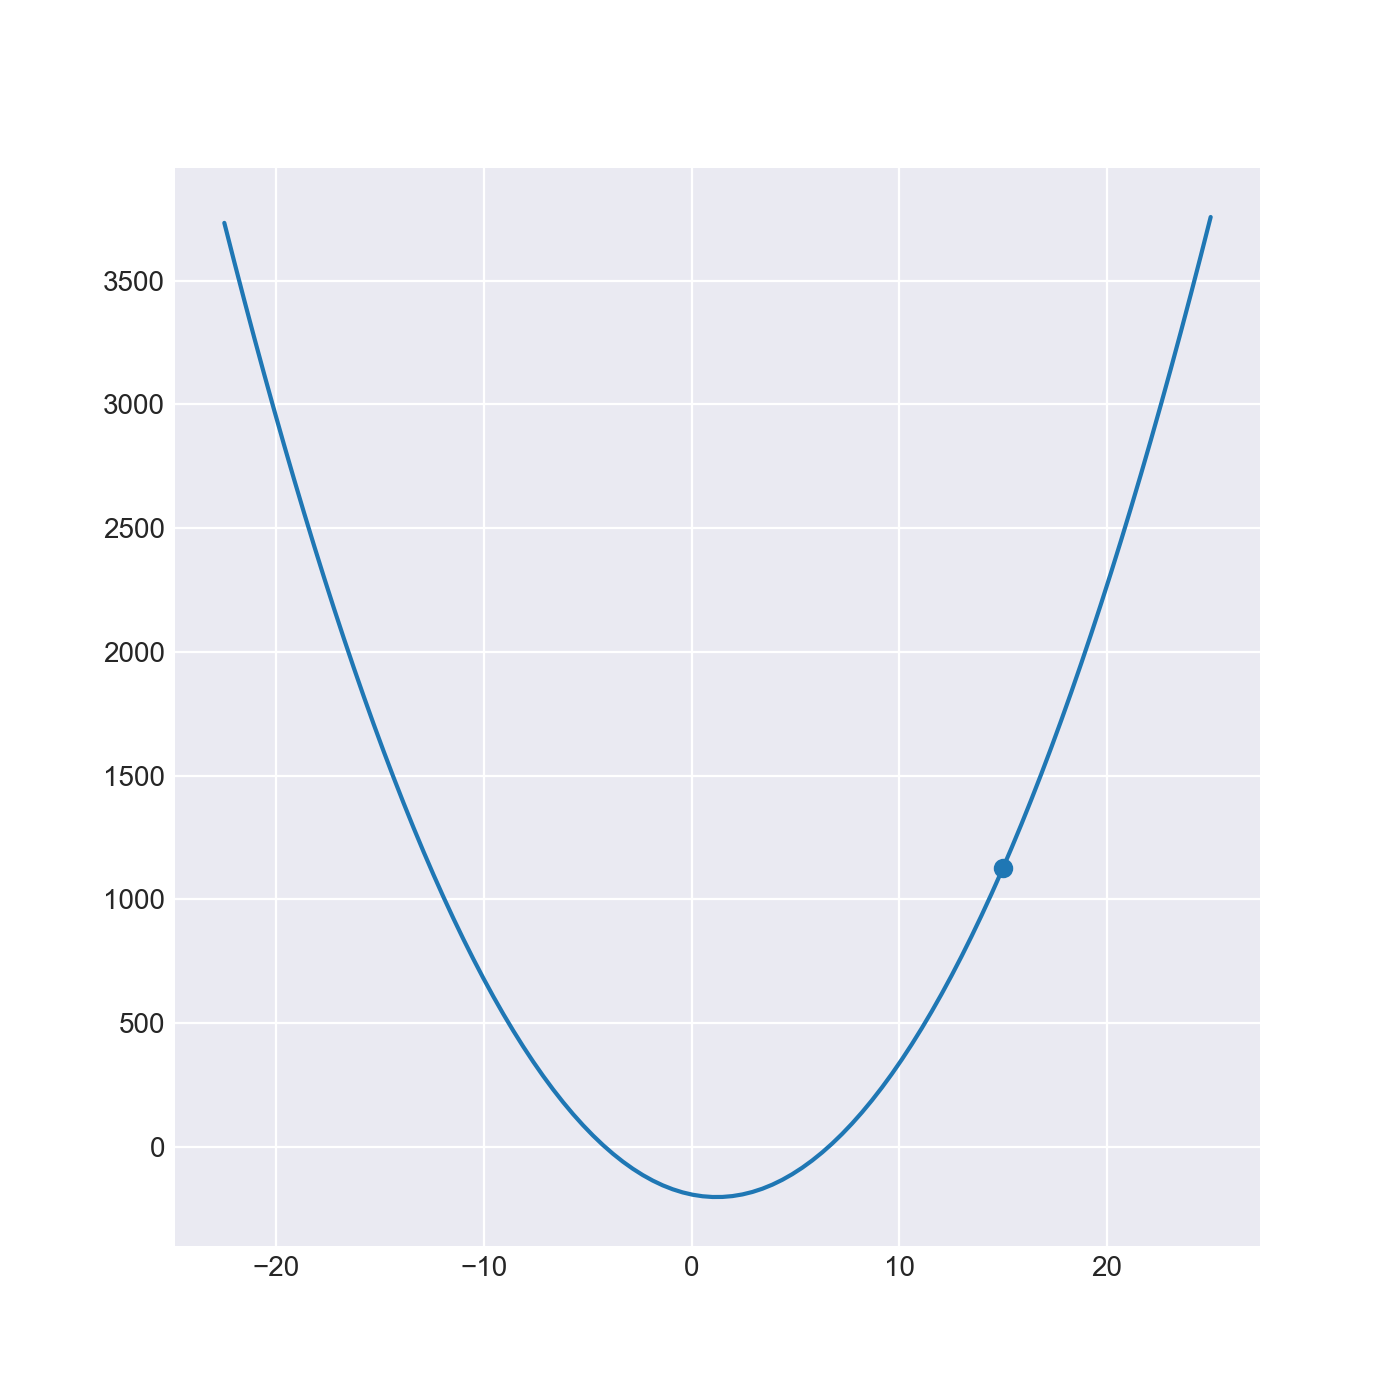

In [12]:
%matplotlib notebook
initial_guess = 15
plt.scatter(initial_guess, (7 * (initial_guess ** 2)) - (17 * initial_guess) - 193)
plt.plot(graph_x, graph_y)
plt.show()

It's pretty far off from the actual minimum of the parabola.

We need to move our guess to the left of our initial pick to get to the minimum value of the function.

But how can we automate this, make it "computer friendly?"

We can start by trying to figure out which way is "downhill".

The gradient of a function tells us which direction is the steepest headed uphill, from a given location, or point. 

If we know which way is the steepest uphill, if we just head in the opposite direction, it should be the steepest downhill as well. 

In order to start with gradient descent, we'll need the gradient. For functions that only have one variable, this is equivalent to taking the derivative. 

$$\nabla f(x) = \frac {d}{dx} f(x) = 14x - 17$$

Since the derivative tells us the direction the graph is increasing in, we'll need to adjust our guess in the other direction, in order to head downhill in the steepest direction.

$x_{n+1} = x_{n} - \alpha \nabla f(x_{n})$ 

Our new guess, $x_{1}$, will be our old guess, $x_{0}$, nudged in the direction of steepest descent: $\nabla f(x_{n})$.

In [13]:
# function to minimize - f(x) = 7x^2 - 17x - 193
# f'(x) = 14x - 17

initial_guess = 15
learning_parameter = 0.1

def gradient_descent(starting_point, learning_rate, iterations):
    for i in range(iterations):
        starting_point = starting_point - learning_parameter * (14 * starting_point - 17)
    return starting_point


for i in (1, 2, 3, 4, 5, 10, 100, 100000):
    print(gradient_descent(initial_guess, learning_parameter, i))

-4.300000000000001
3.4200000000000017
0.33199999999999896
1.5672000000000006
1.0731199999999996
1.2157312511999998
1.2142857142857142
1.2142857142857142


In [14]:
# lets try to generalize the algorithm

import sympy as sp

x = sp.Symbol('x')

minimize_this_function = 18*x**2 - 10000*x**-5 + 9078
print(sp.diff(minimize_this_function, x))

36*x + 50000/x**6
